C:\git\LondonCS\CM3060-NLP\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


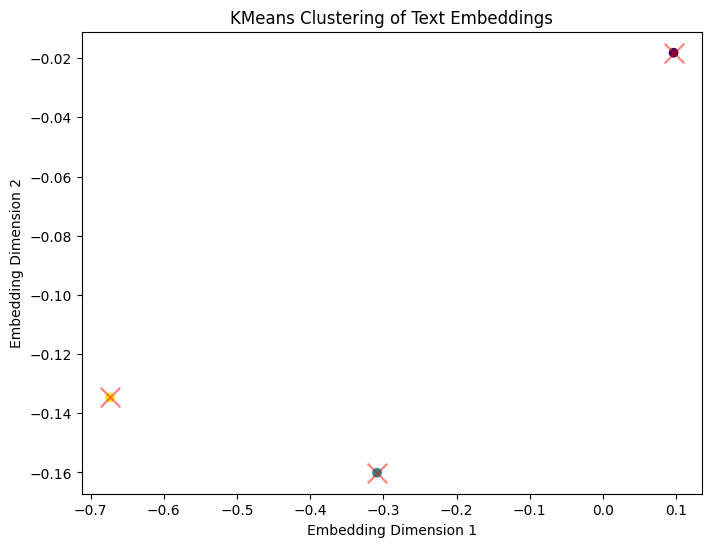

In [2]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Initialize tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# Define two classes of texts
texts = ["Expertise in Python, machine learning, and data analysis.",
         "Able to read construction drawings" ,# Class 1
         "Proficient in web development, JavaScript, and React."]     # Class 2

# Generate embeddings
embeddings = []
with torch.no_grad():
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
        outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())

# Convert list of embeddings into an array for KMeans
embeddings_array = np.array(embeddings)

# Run KMeans with 2 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(embeddings_array)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_array[:, 0], embeddings_array[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='x')
plt.title("KMeans Clustering of Text Embeddings")
plt.xlabel("Embedding Dimension 1")
plt.ylabel("Embedding Dimension 2")
plt.show()


C:\git\LondonCS\CM3060-NLP\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


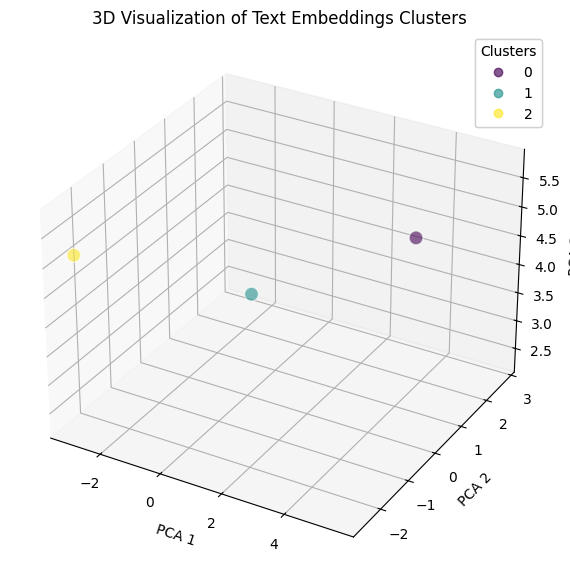

In [15]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming `embeddings_array` is your array of BERT embeddings
# Reduce to 3 dimensions for 3D visualization
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(embeddings_array)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(reduced_embeddings)

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
scatter = ax.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], reduced_embeddings[:, 2],
                     c=clusters, cmap='viridis', marker='o', s=100, alpha=0.6, edgecolors='w')

# Labeling the axes
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.title("3D Visualization of Text Embeddings Clusters")
plt.show()